Name: Syed Mokthiyar S M

Reg No: 212222230156

In [16]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
X_train.shape

(60000, 28, 28)

In [20]:
X_test.shape


(10000, 28, 28)

In [24]:
single_image= X_train[0]

In [25]:
single_image.shape

(28, 28)

Syed Mokthiyar S M 
212222230156


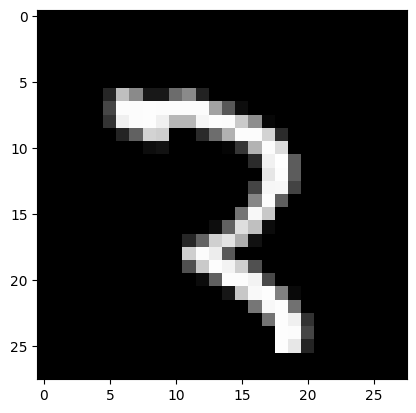

In [64]:
plt.imshow(single_image,cmap='gray')
print('''Syed Mokthiyar S M
212222230156''')

In [27]:
y_train.shape

(60000,)

In [28]:
X_train.min()

0

In [29]:
X_train.max()

255

In [30]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0


In [31]:
X_train_scaled.min()

0.0

In [32]:
X_train_scaled.min()

1.0

In [33]:
y_train[0]

5

In [34]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [35]:
type(y_train_onehot)

numpy.ndarray

In [36]:
y_train_onehot.shape

(60000, 10)

Syed Mokthiyar S M 
212222230156


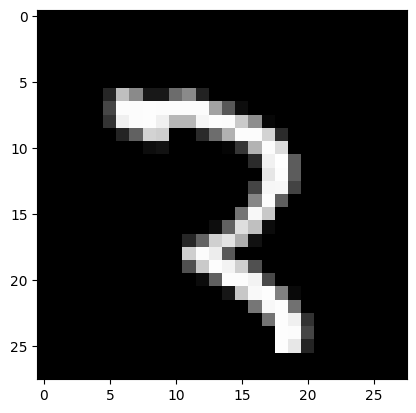

In [65]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
print('''Syed Mokthiyar S M
212222230156''')

In [38]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [39]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [40]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [41]:
model.summary()
print('''Syed Mokthiyar S M
212222230156''')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

Syed Mokthiyar S M 
212222230156


In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.8562 - loss: 0.4947 - val_accuracy: 0.9755 - val_loss: 0.0844
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.9760 - loss: 0.0800 - val_accuracy: 0.9757 - val_loss: 0.0796
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.9837 - loss: 0.0537 - val_accuracy: 0.9817 - val_loss: 0.0576
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9895 - loss: 0.0364 - val_accuracy: 0.9815 - val_loss: 0.0525
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9809 - val_loss: 0.0583


In [44]:
metrics = pd.DataFrame(model.history.history)

In [45]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.929250,0.242943,0.9755,0.084423
1,0.977150,0.076620,0.9757,0.079640
2,0.983750,0.053124,0.9817,0.057645
3,0.987983,0.040148,0.9815,0.052500
4,0.989650,0.033338,0.9809,0.058311


Syed Mokthiyar S M 
212222230156


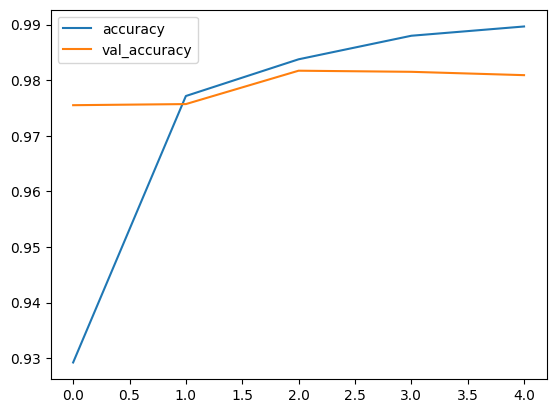

In [46]:
metrics[['accuracy','val_accuracy']].plot()
print('''Syed Mokthiyar S M
212222230156''')

Syed Mokthiyar S M 
212222230156


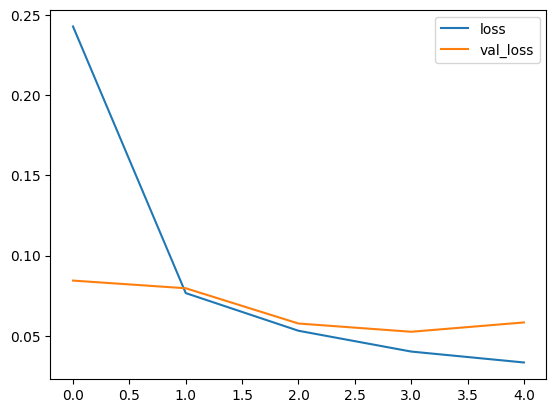

In [47]:
metrics[['loss','val_loss']].plot()
print('''Syed Mokthiyar S M
212222230156''')

In [48]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [49]:
print(confusion_matrix(y_test,x_test_predictions))
print('''Syed Mokthiyar S M
212222230156''')

[[ 976    0    1    0    0    0    1    1    1    0]
 [   0 1120    3    0    1    0    6    1    4    0]
 [   4    0 1009    0    3    0    2    5    7    2]
 [   1    0    4  968    0   11    0    3    8   15]
 [   1    0    0    0  966    0    1    0    0   14]
 [   3    0    0    3    0  873    5    0    2    6]
 [  11    2    0    0    1    1  939    0    4    0]
 [   0    2   10    2    0    0    0 1004    1    9]
 [   9    0    2    1    0    0    0    1  955    6]
 [   2    0    0    0    2    2    0    3    1  999]]
Syed Mokthiyar S M 
212222230156


In [50]:
print(classification_report(y_test,x_test_predictions))
print('''Syed Mokthiyar S M
212222230156''')

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.96      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.95      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Syed Mokthiyar S M 
212222230156


In [74]:
img = image.load_img('four.jpg')


In [75]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [77]:
img = image.load_img('four.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [78]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [79]:

print(x_single_prediction)

[5]


Syed Mokthiyar S M 
212222230156


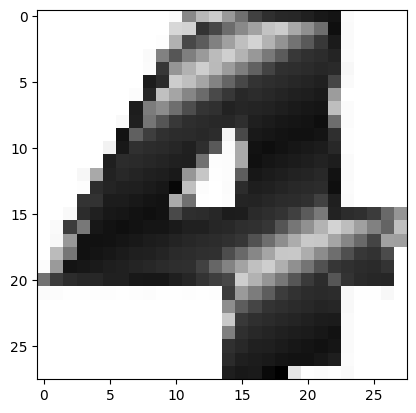

In [84]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print('''Syed Mokthiyar S M
212222230156''')

In [85]:
print(x_single_prediction)

[4]


In [81]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [82]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [83]:
print(x_single_prediction)

[4]
